# Description of the homework

"In an attached zip you can find some csv files with sales between 2001-2004 and in the excel files you have the masterdata. So you have two types of files.
 1. There are excel files which contains masterdata (starts with Dim prefix)
 2. Actual by years (csv files) and budget data (ExpectedSales.xlsx)
    
You have the following tasks for you:
1. Please create a visualization which presents the mountain bikes sales globally between 2001-2004. Note :Please use python only for this task.
2. The stakeholders would like to see a ML forecast for the expected sales in the next 4 quarters. Please describe what steps would you do to create such a machine learning solution, what algorithms you would use and how would you measure the performance of the algorithms? Please do a small demo for the global mountain bike sales, describe the algorithms, tools etc."


In [3]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf


mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [4]:
df_customer=pd.read_excel('data_bike/DimCustomer.xlsx', sheet_name='DimCustomer', header=[0])

In [5]:
df_customer.head().transpose()

,0,1,2,3,4
CustomerKey,11602,11603,11610,12517,12518
GeographyKey,135,244,269,133,161
CustomerAlternateKey,AW00011602,AW00011603,AW00011610,AW00012517,AW00012518
Title,NaN,NaN,NaN,NaN,NaN
FirstName,Larry,Geoffrey,Blake,Alexa,Jacquelyn
MiddleName,NaN,NaN,NaN,NaN,NaN
LastName,Gill,Gonzalez,Collins,Watson,Dominguez
NameStyle,False,False,False,False,False
BirthDate,1977-04-13 00:00:00,1977-02-06 00:00:00,1975-04-23 00:00:00,1977-08-25 00:00:00,1977-09-27 00:00:00
MaritalStatus,S,S,S,S,S


In [6]:
df_geograpgy=pd.read_excel('data_bike/DimGeography.xlsx', sheet_name='DimGeography', header=[0])

In [7]:
df_geograpgy.head()

,GeographyKey,City,StateProvinceCode,StateProvinceName,CountryRegionCode,EnglishCountryRegionName,SpanishCountryRegionName,FrenchCountryRegionName,PostalCode,SalesTerritoryKey
0,135,Salzgitter,HE,Hessen,DE,Germany,Alemania,Allemagne,38231,8
1,136,Ascheim,HH,Hamburg,DE,Germany,Alemania,Allemagne,86171,8
2,137,Augsburg,HH,Hamburg,DE,Germany,Alemania,Allemagne,86171,8
3,138,Berlin,HH,Hamburg,DE,Germany,Alemania,Allemagne,10210,8
4,139,Berlin,HH,Hamburg,DE,Germany,Alemania,Allemagne,10791,8


In [8]:
df_productCat=pd.read_excel('data_bike/DimProductCategory.xlsx', sheet_name='DimProductCategory', header=[0])

In [9]:
df_productCat.head()

,ProductCategoryKey,ProductCategoryAlternateKey,EnglishProductCategoryName,SpanishProductCategoryName,FrenchProductCategoryName
0,1,1,Bikes,Bicicleta,Vélo
1,2,2,Components,Componente,Composant
2,3,3,Clothing,Prenda,Vêtements
3,4,4,Accessories,Accesorio,Accessoire


In [10]:
df_productSubCat=pd.read_excel('data_bike/DimProductSubCategory.xlsx', sheet_name='DimProductSubCategory', header=[0])

In [11]:
df_productSubCat.head()

,ProductSubcategoryKey,ProductSubcategoryAlternateKey,EnglishProductSubcategoryName,SpanishProductSubcategoryName,FrenchProductSubcategoryName,ProductCategoryKey
0,1,1,Mountain Bikes,Bicicleta de montaña,VTT,1
1,2,2,Road Bikes,Bicicleta de carretera,Vélo de route,1
2,3,3,Touring Bikes,Bicicleta de paseo,Vélo de randonnée,1
3,4,4,Handlebars,Barra,Barre d'appui,2
4,5,5,Bottom Brackets,Eje de pedalier,Axe de pédalier,2


In [12]:
df_productSubCat.describe()

,ProductSubcategoryKey,ProductSubcategoryAlternateKey,ProductCategoryKey
count,37.000000,37.000000,37.000000
mean,19.000000,19.000000,2.783784
std,10.824355,10.824355,1.003747
min,1.000000,1.000000,1.000000
25%,10.000000,10.000000,2.000000
50%,19.000000,19.000000,3.000000
75%,28.000000,28.000000,4.000000
max,37.000000,37.000000,4.000000


In [13]:
df_salseTerritory=pd.read_excel('data_bike/DimSalesTerritory.xlsx', sheet_name='DimSalesTerritory', header=[0])

In [14]:
df_salseTerritory.head()

,SalesTerritoryKey,SalesTerritoryAlternateKey,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup
0,1,1,Northwest,United States,North America
1,2,2,Northeast,United States,North America
2,3,3,Central,United States,North America
3,4,4,Southwest,United States,North America
4,5,5,Southeast,United States,North America


In [15]:
df_expectedSales=pd.read_excel('data_bike/ExpectedSales.xlsx', sheet_name='Sheet1', header=[0])

In [16]:
df_expectedSales.dtypes

SalesTerritoryRegion     object
ProductSubcategory       object
2003/01                 float64
2003/02                 float64
2003/03                 float64
2003/04                 float64
2003/05                 float64
2003/06                 float64
2003/07                 float64
2003/08                 float64
2003/09                 float64
2003/10                 float64
2003/11                 float64
2003/12                 float64
2003/Total                int64
2004/01                 float64
2004/02                 float64
2004/03                 float64
2004/04                 float64
2004/05                 float64
2004/06                 float64
2004/07                 float64
2004/Total                int64
dtype: object

In [17]:
df_product=pd.read_excel('data_bike/DimProduct2.xlsx', header=[0])

In [18]:
df_product.dtypes

ProductKey                        int64
ProductAlternateKey              object
ProductSubcategoryKey           float64
WeightUnitMeasureCode            object
SizeUnitMeasureCode              object
EnglishProductName               object
SpanishProductName               object
FrenchProductName                object
StandardCost                    float64
FinishedGoodsFlag                  bool
Color                            object
SafetyStockLevel                  int64
ReorderPoint                      int64
ListPrice                       float64
Size                             object
SizeRange                        object
Weight                          float64
DaysToManufacture                 int64
ProductLine                      object
DealerPrice                     float64
Class                            object
Style                            object
ModelName                        object
EnglishDescription               object
FrenchDescription                object


In [19]:
df_product.head().transpose()

,0,1,2,3,4
ProductKey,1,2,12,14,15
ProductAlternateKey,AR-5381,BA-8327,CR-9981,DC-8732,DC-9824
ProductSubcategoryKey,NaN,NaN,NaN,NaN,NaN
WeightUnitMeasureCode,NaN,NaN,NaN,NaN,NaN
SizeUnitMeasureCode,NaN,NaN,NaN,NaN,NaN
EnglishProductName,Adjustable Race,Bearing Ball,Crown Race,Decal 1,Decal 2
SpanishProductName,NaN,NaN,NaN,NaN,NaN
FrenchProductName,NaN,NaN,NaN,NaN,NaN
StandardCost,NaN,NaN,NaN,NaN,NaN
FinishedGoodsFlag,False,False,False,False,False


In [20]:
df_product.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ProductKey,606.0,303.500000,175.081410,1.0000,152.2500,303.5000,454.7500,606.0000
ProductSubcategoryKey,397.0,12.128463,9.423328,1.0000,2.0000,13.0000,16.0000,37.0000
StandardCost,395.0,434.265829,497.379884,0.8565,37.1209,204.6251,660.9142,2171.2942
SafetyStockLevel,606.0,495.201320,364.007114,4.0000,100.0000,500.0000,1000.0000,1000.0000
ReorderPoint,606.0,371.400990,273.005336,3.0000,75.0000,375.0000,750.0000,750.0000
ListPrice,395.0,747.661762,838.708451,2.2900,69.9900,364.0900,1204.3248,3578.2700
Weight,282.0,56.193227,158.000652,2.1200,2.6800,15.4200,24.1300,1050.0000
DaysToManufacture,606.0,1.201320,1.508893,0.0000,0.0000,1.0000,1.0000,4.0000
DealerPrice,395.0,448.597060,503.225071,1.3740,41.9940,218.4540,722.5949,2146.9620


In [21]:
df_salse2001=pd.read_csv('data_bike/Sales2001.csv', sep=';',decimal=',')
df_salse2002=pd.read_csv('data_bike/Sales2002.csv', sep=';',decimal=',')
df_salse2003=pd.read_csv('data_bike/Sales2003.csv', sep=';',decimal=',')
df_salse2004=pd.read_csv('data_bike/Sales2004.csv', sep=';',decimal=',')

In [22]:
frames = [df_salse2001, df_salse2002, df_salse2003, df_salse2004]
df_salse= pd.concat(frames)

In [23]:
df_salse.dtypes

ProductKey                 int64
OrderDate                 object
OrderDateKey               int64
DueDateKey                 int64
ShipDateKey                int64
CustomerKey                int64
PromotionKey               int64
CurrencyKey                int64
SalesTerritoryKey          int64
SalesOrderNumber          object
SalesOrderLineNumber       int64
RevisionNumber             int64
OrderQuantity              int64
UnitPrice                float64
ExtendedAmount           float64
UnitPriceDiscountPct       int64
DiscountAmount             int64
ProductStandardCost      float64
TotalProductCost         float64
SalesAmount              float64
TaxAmt                   float64
Freight                  float64
CarrierTrackingNumber    float64
CustomerPONumber         float64
Field2                     int64
RegionMonthID             object
dtype: object

In [24]:
df_salse['OrderDateKey'] = pd.to_datetime(df_salse['OrderDateKey'], format='%Y%m%d')
df_salse['DueDateKey'] = pd.to_datetime(df_salse['DueDateKey'], format='%Y%m%d')
df_salse['ShipDateKey'] = pd.to_datetime(df_salse['ShipDateKey'], format='%Y%m%d')

In [25]:
df_salse.head().transpose()

,0,1,2,3,4
ProductKey,314,314,314,314,314
OrderDate,2001.07.14 0:00,2001.07.17 0:00,2001.08.18 0:00,2001.09.06 0:00,2001.09.07 0:00
OrderDateKey,2001-07-14 00:00:00,2001-07-17 00:00:00,2001-08-18 00:00:00,2001-09-06 00:00:00,2001-09-07 00:00:00
DueDateKey,2001-07-26 00:00:00,2001-07-29 00:00:00,2001-08-30 00:00:00,2001-09-18 00:00:00,2001-09-19 00:00:00
ShipDateKey,2001-07-21 00:00:00,2001-07-24 00:00:00,2001-08-25 00:00:00,2001-09-13 00:00:00,2001-09-14 00:00:00
CustomerKey,27623,27578,27681,28193,28183
PromotionKey,1,1,1,1,1
CurrencyKey,100,100,100,100,100
SalesTerritoryKey,4,4,4,4,4
SalesOrderNumber,SO43747,SO43762,SO43994,SO44163,SO44170


In [26]:
df_salse['ProductSubcategoryKey']=df_salse['ProductKey'].apply(lambda x:   df_product[df_product["ProductKey"] == x]["ProductSubcategoryKey"].to_list()[0])
df_salse['ProductSubcategoryName']=df_salse['ProductSubcategoryKey'].apply(lambda x:   df_productSubCat[df_productSubCat["ProductSubcategoryKey"] == x]["EnglishProductSubcategoryName"].to_list()[0])
df_salse['ProductCategoryKey']=df_salse['ProductSubcategoryKey'].apply(lambda x:   df_productSubCat[df_productSubCat["ProductSubcategoryKey"] == x]["ProductCategoryKey"].to_list()[0])
df_salse['ProductCategoryName']=df_salse['ProductCategoryKey'].apply(lambda x:   df_productCat[df_productCat["ProductCategoryKey"] == x]["EnglishProductCategoryName"].to_list()[0])


In [27]:
df_salse['Gender']=df_salse['CustomerKey'].apply(lambda x:   df_customer[df_customer["CustomerKey"] == x]["Gender"].to_list()[0])

In [28]:
df_salse['Country']=df_salse['SalesTerritoryKey'].apply(lambda x:   df_salseTerritory[df_salseTerritory["SalesTerritoryKey"] == x]["SalesTerritoryCountry"].to_list()[0])

In [29]:
df_salse['year']=df_salse['OrderDateKey'].dt.year
df_salse['year-month']=df_salse['OrderDateKey'].dt.strftime('%Y-%m')

In [30]:
df_salse.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ProductKey,60398.0,437.557932,118.088390,214.0000,359.0000,479.0000,529.0000,606.0000
CustomerKey,60398.0,18841.685420,5432.430404,11000.0000,14003.0000,18143.0000,23429.7500,29483.0000
PromotionKey,60398.0,1.041839,0.342605,1.0000,1.0000,1.0000,1.0000,14.0000
CurrencyKey,60398.0,69.845326,42.146363,6.0000,19.0000,100.0000,100.0000,100.0000
SalesTerritoryKey,60398.0,6.244462,2.961150,1.0000,4.0000,7.0000,9.0000,10.0000
SalesOrderLineNumber,60398.0,1.886321,1.016328,1.0000,1.0000,2.0000,2.0000,8.0000
RevisionNumber,60398.0,1.000000,0.000000,1.0000,1.0000,1.0000,1.0000,1.0000
OrderQuantity,60398.0,1.000000,0.000000,1.0000,1.0000,1.0000,1.0000,1.0000
UnitPrice,60398.0,486.086911,928.489892,2.2900,7.9500,29.9900,539.9900,3578.2700
ExtendedAmount,60398.0,486.086911,928.489892,2.2900,7.9500,29.9900,539.9900,3578.2700


## Visualization which presents the mountain bikes sales globally between 2001-2004

In [338]:
df_salse

,ProductKey,OrderDate,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,Field2,RegionMonthID,ProductSubcategoryKey
0,314,2001.07.14 0:00,2001-07-14,2001-07-26,2001-07-21,27623,1,100,4,SO43747,...,2171.2942,2171.2942,3578.27,286.2616,89.4568,NaN,NaN,3,Southwest7,2.0
1,314,2001.07.17 0:00,2001-07-17,2001-07-29,2001-07-24,27578,1,100,4,SO43762,...,2171.2942,2171.2942,3578.27,286.2616,89.4568,NaN,NaN,1,Southwest7,2.0
2,314,2001.08.18 0:00,2001-08-18,2001-08-30,2001-08-25,27681,1,100,4,SO43994,...,2171.2942,2171.2942,3578.27,286.2616,89.4568,NaN,NaN,3,Southwest8,2.0
3,314,2001.09.06 0:00,2001-09-06,2001-09-18,2001-09-13,28193,1,100,4,SO44163,...,2171.2942,2171.2942,3578.27,286.2616,89.4568,NaN,NaN,1,Southwest9,2.0
4,314,2001.09.07 0:00,2001-09-07,2001-09-19,2001-09-14,28183,1,100,4,SO44170,...,2171.2942,2171.2942,3578.27,286.2616,89.4568,NaN,NaN,1,Southwest9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24438,480,2003.12.14 0:00,2003-12-14,2003-12-26,2003-12-21,15295,2,100,4,SO60006,...,0.8565,0.8565,2.29,0.1832,0.0573,NaN,NaN,2,Southwest12,37.0
24439,480,2003.12.19 0:00,2003-12-19,2003-12-31,2003-12-26,14593,2,100,4,SO60347,...,0.8565,0.8565,2.29,0.1832,0.0573,NaN,NaN,1,Southwest12,37.0
24440,480,2003.12.25 0:00,2003-12-25,2004-01-06,2004-01-01,23483,2,100,4,SO60709,...,0.8565,0.8565,2.29,0.1832,0.0573,NaN,NaN,1,Southwest12,37.0
24441,480,2003.12.25 0:00,2003-12-25,2004-01-06,2004-01-01,16242,2,100,4,SO60717,...,0.8565,0.8565,2.29,0.1832,0.0573,NaN,NaN,1,Southwest12,37.0


<AxesSubplot:ylabel='ProductCategoryName'>

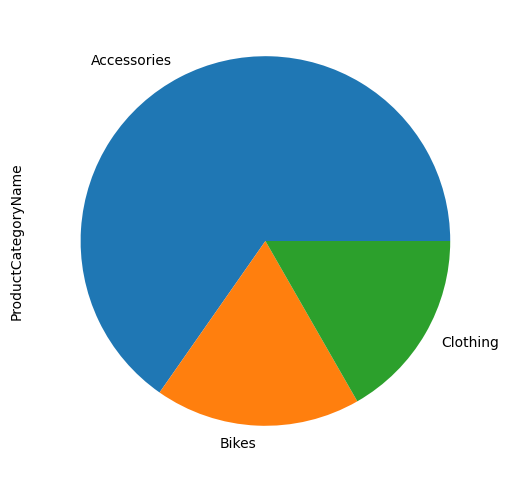

In [208]:
df_salse2004['ProductCategoryName'].value_counts().plot(kind='pie')

In [277]:
df

,ProductCategoryName,ProductSubcategoryName,OrderQuantity
0,Accessories,Bike Racks,191
1,Accessories,Bike Stands,130
2,Accessories,Bottles and Cages,4708
3,Accessories,Cleaners,525
4,Accessories,Fenders,1238
5,Accessories,Helmets,3794
6,Accessories,Hydration Packs,428
7,Accessories,Tires and Tubes,10053
8,Bikes,Mountain Bikes,2094
9,Bikes,Road Bikes,2369


([<matplotlib.patches.Wedge at 0x7ff2b47fab50>,
 [Text(0.7698879395092308, 0.013136232269225518, 'Bike Racks'),
  Text(0.7691470328138039, 0.03623316041585798, 'Bike Stands'),
  Text(0.6847005951257805, 0.35225714334048913, 'Bottles and Cages'),
  Text(0.45568026640815684, 0.6206895317356264, 'Cleaners'),
  Text(0.35264889531491267, 0.6844989091541138, 'Fenders'),
  Text(0.02342650747118486, 0.7696435530475797, 'Helmets'),
  Text(-0.2587250804016051, 0.7252319165420005, 'Hydration Packs'),
  Text(-0.738182835183048, 0.21905730264274928, 'Tires and Tubes'),
  Text(-0.49559734597841826, -0.5893074500285467, 'Mountain Bikes'),
  Text(-0.016219726045752756, -0.7698291501930807, 'Road Bikes'),
  Text(0.376773680121409, -0.6715218492110069, 'Touring Bikes'),
  Text(0.5180260991395522, -0.5696919874899583, 'Caps'),
  Text(0.6155067068875668, -0.46265699365342233, 'Gloves'),
  Text(0.7101510163103333, -0.2976332206481676, 'Jerseys'),
  Text(0.7588276171725907, -0.13069295090466115, 'Shorts'),


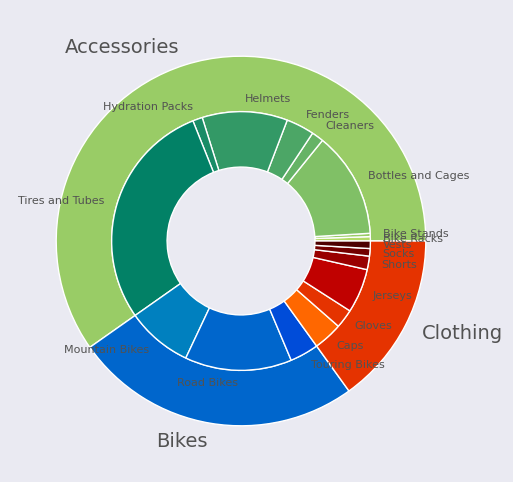

In [31]:
df = df_salse[['OrderQuantity', 'ProductCategoryName', 'ProductSubcategoryName']]
df=df.groupby(['ProductCategoryName', 'ProductSubcategoryName'])['OrderQuantity'].sum().reset_index()
group_sum = df.groupby('ProductCategoryName')['OrderQuantity'].sum()


facecolor = '#eaeaf2'
font_color = '#525252'
hfont = {'fontname':'Calibri'}
labels = group_sum.reset_index()['ProductCategoryName']
labels2 = df.reset_index()['ProductSubcategoryName']
size = 0.3
vals = df['OrderQuantity']

a,b,c,d,e,f,g,h,i = [plt.cm.summer, plt.cm.winter, plt.cm.gist_heat, plt.cm.autumn, plt.cm.spring,plt.cm.copper,plt.cm.cool, plt.cm.bone, plt.cm.pink]

outer_colors = [a(.6), b(.4), c(.6)]
inner_colors = [a(.7), a(.6), a(.5), a(.4), a(.3), a(.2), a(.1), a(.01),
                b(.5), b(.4), b(.3), 
                c(.7), c(.6), c(.5), c(.4), c(.3), c(.2), c(.1)]
    

fig, ax = plt.subplots(figsize=(10,6), facecolor=facecolor)
ax.pie(group_sum,
       colors=outer_colors, 
       labels=labels, 
       radius=1, 
       textprops={'color':font_color, 'size':14},
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals, 
       radius=1-size, # size=0.3
       labels=labels2,
       colors=inner_colors,
       textprops={'color':font_color, 'size':8},
       wedgeprops=dict(width=size, edgecolor='w'))

([<matplotlib.patches.Wedge at 0x7ff2b4810ad0>,
 [Text(0.7699931703738331, 0.0032430815058009732, ''),
  Text(0.7699382933653912, 0.009748046449865608, ''),
  Text(0.7697967955627159, 0.01768879705842521, ''),
  Text(0.7696575618821696, 0.022961651456161702, ''),
  Text(0.7695125063317393, 0.027395302499605433, ''),
  Text(0.7683895641255627, 0.049774267879375625, ''),
  Text(0.7666644652858703, 0.07159327948858445, ''),
  Text(0.7641164130861329, 0.09500582746538395, ''),
  Text(0.2682261571044202, 0.7217719367258573, ''),
  Text(-0.592767813262923, -0.491453273017377, ''),
  Text(0.6815087439067433, -0.35839340392737834, ''),
  Text(0.7680812781625793, -0.054324489285573964, ''),
  Text(0.7683861430886507, -0.04982705198331171, ''),
  Text(0.769304657476514, -0.032716112008358555, ''),
  Text(0.7698969253433201, -0.012598585115087798, ''),
  Text(0.7699742112986242, -0.0063018993217646745, ''),
  Text(0.7699943843045234, -0.0029407719221065105, '')])

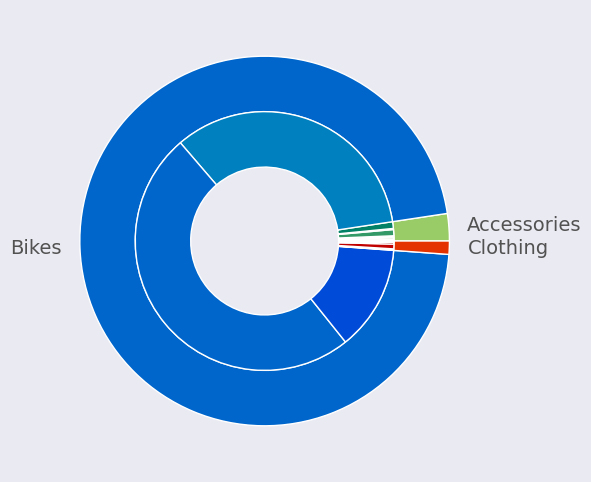

In [32]:
df = df_salse[['UnitPrice', 'ProductCategoryName', 'ProductSubcategoryName']]
df=df.groupby(['ProductCategoryName', 'ProductSubcategoryName'])['UnitPrice'].sum().reset_index()
group_sum = df.groupby('ProductCategoryName')['UnitPrice'].sum()


facecolor = '#eaeaf2'
font_color = '#525252'
hfont = {'fontname':'Calibri'}
labels = group_sum.reset_index()['ProductCategoryName']
labels2 = df.reset_index()['ProductSubcategoryName']
size = 0.3
vals = df['UnitPrice']

a,b,c,d,e,f,g,h,i = [plt.cm.summer, plt.cm.winter, plt.cm.gist_heat, plt.cm.autumn, plt.cm.spring,plt.cm.copper,plt.cm.cool, plt.cm.bone, plt.cm.pink]

outer_colors = [a(.6), b(.4), c(.6)]
inner_colors = [a(.7), a(.6), a(.5), a(.4), a(.3), a(.2), a(.1), a(.01),
                b(.5), b(.4), b(.3), 
                c(.7), c(.6), c(.5), c(.4), c(.3), c(.2), c(.1)]
    

fig, ax = plt.subplots(figsize=(10,6), facecolor=facecolor)
ax.pie(group_sum,
       colors=outer_colors, 
       labels=labels, 
       radius=1, 
       textprops={'color':font_color, 'size':14},
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals, 
       radius=1-size, # size=0.3
       #labels=labels2,
       colors=inner_colors,
       textprops={'color':font_color, 'size':8},
       wedgeprops=dict(width=size, edgecolor='w'))

### Customer Analysis

age/gender/geo per product category

In [132]:
df_salse_m

,ProductKey,OrderDate,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,...,Field2,RegionMonthID,ProductSubcategoryKey,ProductSubcategoryName,ProductCategoryKey,ProductCategoryName,Gender,Country,year,year-month
0,314,2001.07.14 0:00,2001-07-14,2001-07-26,2001-07-21,27623,1,100,4,SO43747,...,3,Southwest7,2.0,Road Bikes,1,Bikes,M,United States,2001,2001-07
1,314,2001.07.17 0:00,2001-07-17,2001-07-29,2001-07-24,27578,1,100,4,SO43762,...,1,Southwest7,2.0,Road Bikes,1,Bikes,F,United States,2001,2001-07
2,314,2001.08.18 0:00,2001-08-18,2001-08-30,2001-08-25,27681,1,100,4,SO43994,...,3,Southwest8,2.0,Road Bikes,1,Bikes,F,United States,2001,2001-08
3,314,2001.09.06 0:00,2001-09-06,2001-09-18,2001-09-13,28193,1,100,4,SO44163,...,1,Southwest9,2.0,Road Bikes,1,Bikes,F,United States,2001,2001-09
4,314,2001.09.07 0:00,2001-09-07,2001-09-19,2001-09-14,28183,1,100,4,SO44170,...,1,Southwest9,2.0,Road Bikes,1,Bikes,F,United States,2001,2001-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32260,480,2004.06.15 0:00,2004-06-15,2004-06-27,2004-06-22,14403,2,100,4,SO72989,...,1,Southwest6,37.0,Tires and Tubes,4,Accessories,F,United States,2004,2004-06
32261,480,2004.06.16 0:00,2004-06-16,2004-06-28,2004-06-23,15477,2,100,4,SO73057,...,1,Southwest6,37.0,Tires and Tubes,4,Accessories,M,United States,2004,2004-06
32262,480,2004.06.18 0:00,2004-06-18,2004-06-30,2004-06-25,15738,2,100,4,SO73210,...,1,Southwest6,37.0,Tires and Tubes,4,Accessories,F,United States,2004,2004-06
32263,480,2004.06.27 0:00,2004-06-27,2004-07-09,2004-07-04,15393,2,100,4,SO73897,...,2,Southwest6,37.0,Tires and Tubes,4,Accessories,F,United States,2004,2004-06


<AxesSubplot:xlabel='count', ylabel='ProductSubcategoryName'>

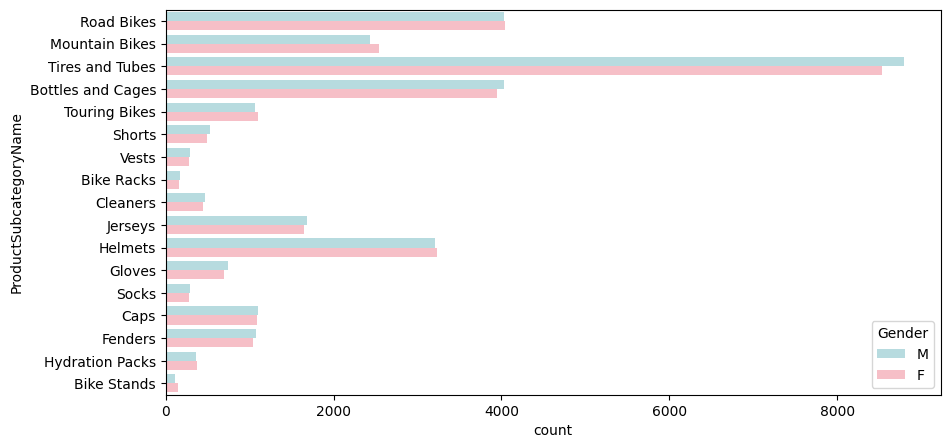

In [135]:
plt.figure(figsize=(10,5))
df_salse
sns.countplot(y=df_salse['ProductSubcategoryName'],data=df_salse,hue=df_salse['Gender'],linewidth=3, palette=["powderblue", "lightpink"])

### Best time to sell

### Market Basket analysis
Market basket analysis is a process that looks for relationships among entities and objects that frequently appear together, such as the collection of items in a shopper’s car.

### Profit track for country

In [130]:
df_salse_m=df_salse.copy()
indexDate = df_salse_m[ (df_salse_m['ProductSubcategoryName'] == 'Mountain Bikes') ].index

df_salse_m.drop(indexDate , inplace=True)

In [131]:
cont2 = pd.pivot_table(df_salse_m, values='SalesAmount', index=['year-month','Country'],
                    columns=[], aggfunc=np.sum).reset_index()
cont2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year-month   205 non-null    object 
 1   Country      205 non-null    object 
 2   SalesAmount  205 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.9+ KB


In [116]:
cont2

,year-month,Country,SalesAmount
0,2001-07,Australia,21469.6200
1,2001-07,Canada,18590.4482
2,2001-07,France,28626.1600
3,2001-07,Germany,28626.1600
4,2001-07,United Kingdom,12832.1046
...,...,...,...
200,2004-07,Canada,7579.4500
201,2004-07,France,3311.0300
202,2004-07,Germany,3386.4100
203,2004-07,United Kingdom,4221.4100


In [117]:
indexDate = cont2[ (cont2['year-month'] == '2004-07') ].index

cont2.drop(indexDate , inplace=True)

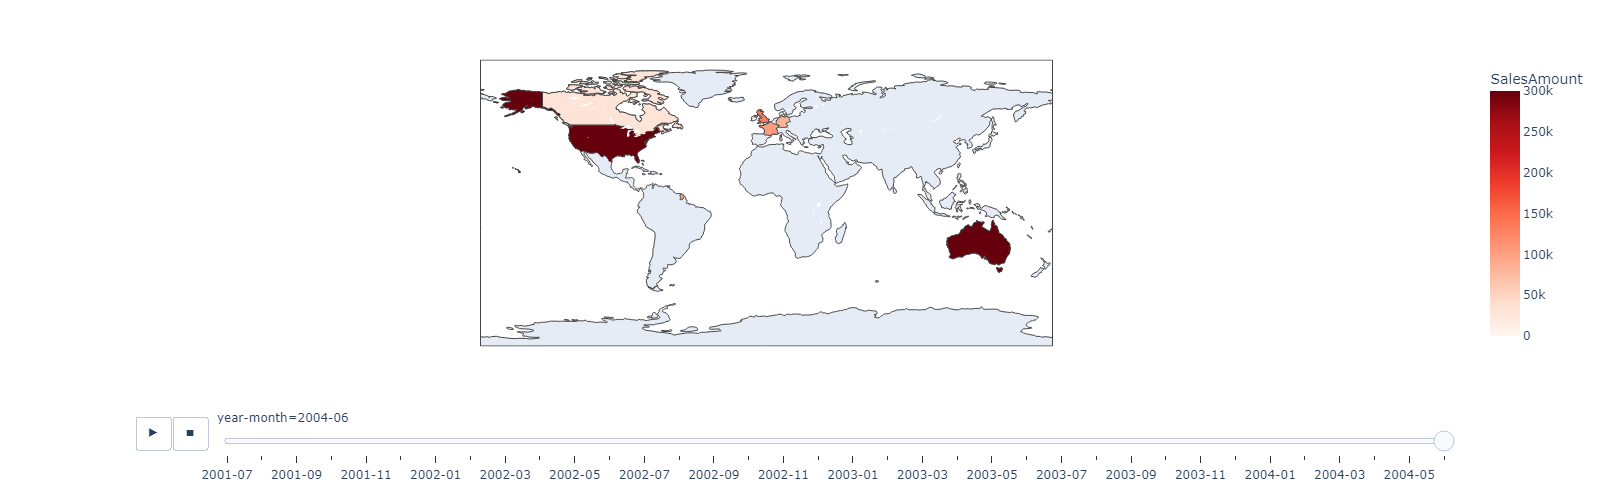

In [123]:
import io
import PIL

#plt.figure(figsize=(10,5))
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

fig = px.choropleth(cont2, locations = cont2['Country'],
                    color = cont2['SalesAmount'],locationmode='country names',hover_name = cont2['SalesAmount'], 
                    color_continuous_scale = px.colors.sequential.Reds,
                    range_color= [0,300000],
                    animation_frame='year-month')
#fig.update_layout(title='Sales tracking')
fig.update_layout(
    autosize=False,
    width=800,
    height=500)

# generate images for each step in animation
frames = []
for s, fr in enumerate(fig.frames):
    # set main traces to appropriate traces within plotly frame
    fig.update(data=fr.data)
    # move slider to correct place
    fig.layout.sliders[0].update(active=s)
    # generate image of current state
    frames.append(PIL.Image.open(io.BytesIO(fig.to_image(format="png"))))

    # create animated GIF
frames[0].save(
        "test.gif",
        save_all=True,
        append_images=frames[1:],
        optimize=True,
        duration=500,
        loop=0,
    )
    

fig.show()

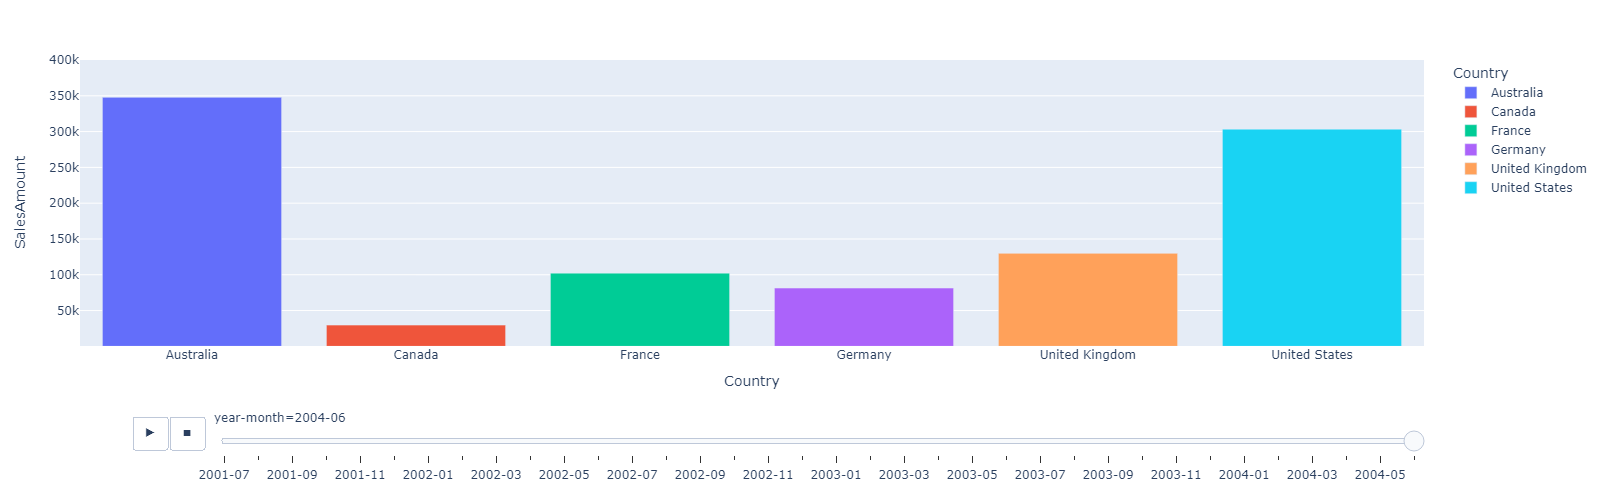

In [121]:
fig = px.bar(cont2, x="Country", y="SalesAmount", animation_frame="year-month", color="Country")
fig.update_layout(
    autosize=False,
    width=800,
    height=500)
fig.update_yaxes(range = [500,400000])

frames = []
for s, fr in enumerate(fig.frames):
    # set main traces to appropriate traces within plotly frame
    fig.update(data=fr.data)
    # move slider to correct place
    fig.layout.sliders[0].update(active=s)
    # generate image of current state
    frames.append(PIL.Image.open(io.BytesIO(fig.to_image(format="png"))))

    # create animated GIF
frames[0].save(
        "salse_country_bar.gif",
        save_all=True,
        append_images=frames[1:],
        optimize=True,
        duration=500,
        loop=0,
    )
    

#fig = px.bar(cont2, x="Country", y="SalesAmount", animation_frame="year-month", yaxis=[5000,500000])
fig.show()

In [124]:
cont22 = pd.pivot_table(cont2, values='SalesAmount', index=['year-month'],
                    columns=['Country'], aggfunc=np.sum).reset_index()

<AxesSubplot:xlabel='year-month'>

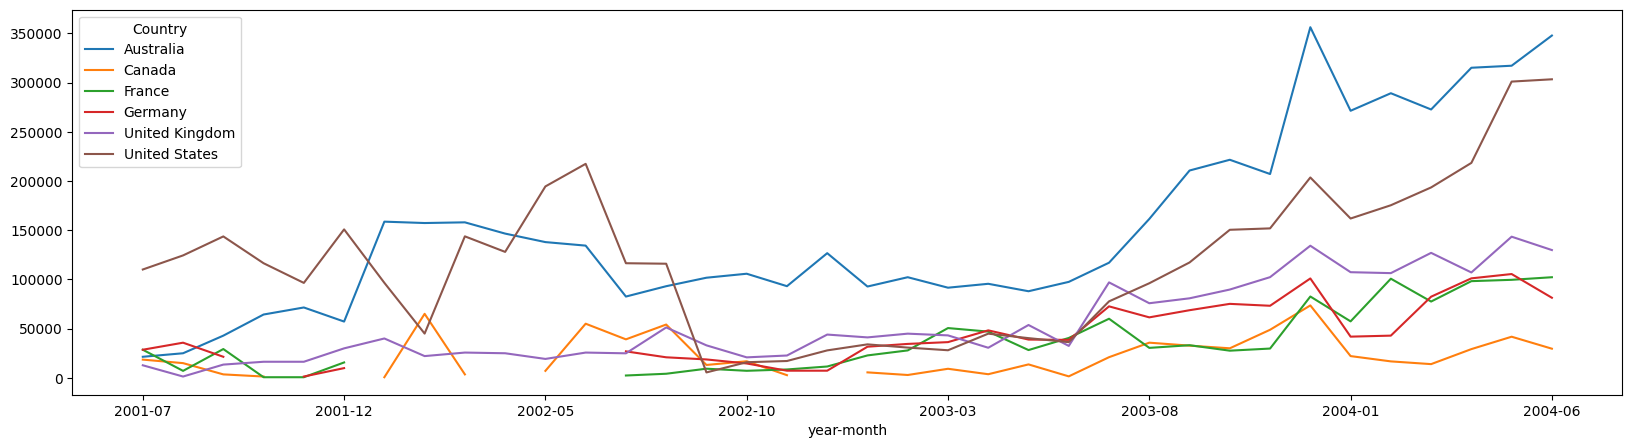

In [125]:
cont22.plot.line(x='year-month', figsize=(20,5))


In [ ]:
df_florish = pd.pivot_table(df, values='Profit', 
                     index=['Country'], 
                     columns='Date')
df_florish = df_florish.fillna(0)
df_florish.to_csv('florish.csv')

In [451]:
 pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 14.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
